In [39]:
import pandas as pd
import datetime
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df_u = pd.read_csv('takehome_users.csv', encoding = 'latin-1')
df_u.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [41]:
df_e = pd.read_csv('takehome_user_engagement.csv', encoding = 'latin-1')
df_e.head(20)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [42]:
df_e['time_stamp'] = pd.to_datetime(df_e['time_stamp'])

In [43]:
df_e.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [44]:
seven_days = datetime.timedelta(7)
adopted_dict = {}

for user_id in sorted(list(df_e['user_id'].unique())):
    
    adopted_user = False
    temp = df_e[df_e['user_id'] == user_id]
    temp = temp.sort_values('time_stamp')
    
    for row in temp.itertuples():
        if adopted_user == True:
            continue
        this_time = temp.get_value(row[0], 'time_stamp')
        if len(temp[(temp['time_stamp'] >= this_time) & (temp['time_stamp'] <= (this_time + seven_days))]) >= 3:
            adopted_user = True
    
    adopted_dict[user_id] = adopted_user

/home/liyan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


In [46]:
#d = {112: 'en', 113: 'es', 114: 'es', 111: 'en'}
df_u['Adopted'] = df_u.object_id.map(adopted_dict)
df_u.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,False
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,False
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,True


In [47]:
df_u = df_u[['object_id','last_session_creation_time','opted_in_to_mailing_list','enabled_for_marketing_drip','org_id','invited_by_user_id','Adopted']]
df_u = df_u.dropna()
df_u.astype('int')
df_u.head()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted
0,1,1.398139e+09,1,0,11,10803.0,False
1,2,1.396238e+09,0,0,1,316.0,True
2,3,1.363735e+09,0,0,94,1525.0,False
3,4,1.369210e+09,0,0,1,5151.0,False
4,5,1.358850e+09,0,0,193,5240.0,False


In [48]:
from sklearn import metrics

def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))


In [49]:
def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  labels=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
labels=level_labels)) 

    print(cm_frame)     

In [50]:
def display_classification_report(true_labels, predicted_labels, classes=[1,0]):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
labels=classes) 
    print(report)

In [51]:
def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, 
                                  classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, 
classes=classes)

In [52]:
X, y = df_u.drop('Adopted', axis=1).astype('int'), df_u.Adopted.astype('int')

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30)

In [54]:
clf_rf = RandomForestClassifier(random_state=1)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

In [55]:
print ('Accuracy on training set: {}'.format(clf_rf.score(X_train, y_train)))
print ('Accuracy on testing set:  {}'.format(clf_rf.score(X_test, y_test)))

Accuracy on training set: 0.9838468441519593
Accuracy on testing set:  0.8743893928820656


In [56]:
clf_rf.feature_importances_.shape

(6,)

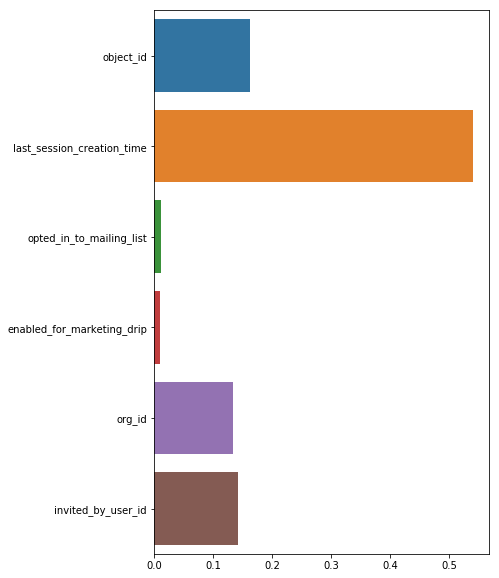

In [57]:
plt.figure(figsize=(6,10))
sns.barplot(y=X.columns, x=clf_rf.feature_importances_)

In [58]:
display_model_performance_metrics(true_labels= y_test, predicted_labels= y_pred, 
                                      classes=[0,1])

Model Performance metrics:
------------------------------
Accuracy: 0.8744
Precision: 0.8665
Recall: 0.8744
F1 Score: 0.8672

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          0       0.90      0.95      0.92      1155
          1       0.74      0.55      0.63       278

avg / total       0.87      0.87      0.87      1433


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   0    1
Actual: 0       1100   55
        1        125  153


Based on the graph, the 'last session creation time' is the most significant feature that predicts future user adoption.